# Preclustering and Cluster Enriched Features

## Purpose
The purpose of this step is to perform a simple pre-clustering using the highly variable features to get a pre-clusters labeling. We then select top enriched features for each cluster (CEF) for further analysis.

## Input
- HVF adata file.

## Output
- HVF adata file with pre-clusters and CEF annotated.

## Import

In [1]:
import seaborn as sns
import anndata
import scanpy as sc
from ALLCools.clustering import cluster_enriched_features, significant_pc_test, log_scale

In [2]:
sns.set_context(context='notebook', font_scale=1.3)

## Parameters

In [3]:
adata_path = 'mCG.HVF.h5ad'

# Cluster Enriched Features analysis
top_n=200
alpha=0.05
stat_plot=True

# you may provide a pre calculated cluster version. 
# If None, will perform basic clustering using parameters below.
cluster_col = None  

# These parameters only used when cluster_col is None
k=25
resolution=1
cluster_plot=True

## Load Data

In [4]:
adata = anndata.read_h5ad(adata_path)

## Pre-Clustering

If cluster label is not provided, will perform basic clustering here

19 components passed P cutoff of 0.1.
Changing adata.obsm['X_pca'] from shape (4875, 100) to (4875, 19)


2022-08-09 13:30:37.860303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-09 13:30:37.860382: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


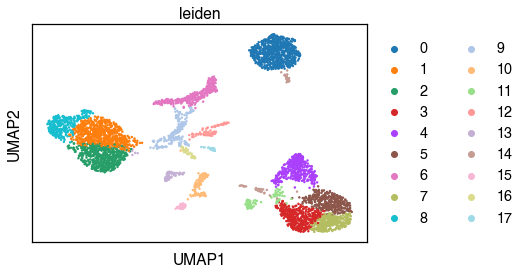

In [5]:
if cluster_col is None:
    # IMPORTANT
    # put the unscaled matrix in adata.raw
    adata.raw = adata
    log_scale(adata)
    
    sc.tl.pca(adata, n_comps=100)
    significant_pc_test(adata, p_cutoff=0.1, update=True)
    
    sc.pp.neighbors(adata, n_neighbors=k)
    sc.tl.leiden(adata, resolution=resolution)
    
    if cluster_plot:
        sc.tl.umap(adata)
        sc.pl.umap(adata, color='leiden')
        
    # return to unscaled X, CEF need to use the unscaled matrix
    adata = adata.raw.to_adata()
    del adata.uns['log']
    
    cluster_col = 'leiden'

## Cluster Enriched Features (CEF)

Found 18 clusters to compute feature enrichment score
Computing enrichment score
Computing enrichment score FDR-corrected P values
Selected 1960 unique features


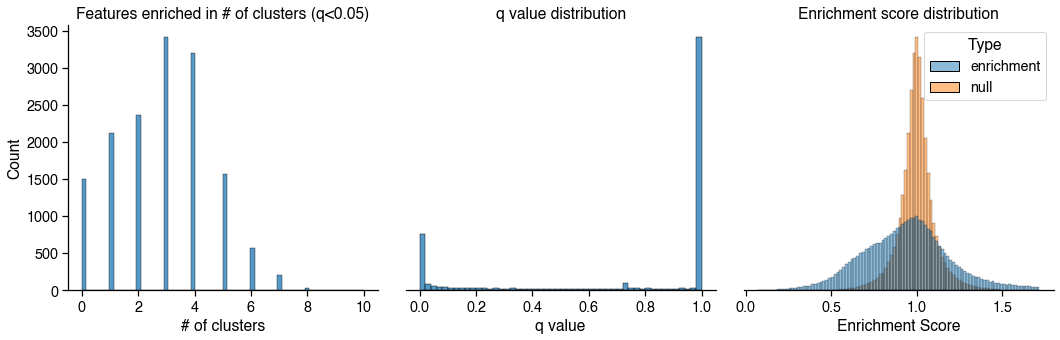

In [6]:
cluster_enriched_features(adata,
                          cluster_col=cluster_col,
                          top_n=top_n,
                          alpha=alpha,
                          stat_plot=True)

## Save AnnData

In [7]:
# save adata
adata.write_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 4875 × 15000
    obs: 'leiden'
    var: 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'log', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'leiden_feature_enrichment'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'